In [311]:
import pandas as pd

dataset = pd.read_csv("COVID-19_Survey_Student_Responses.csv")

In [312]:
dataset

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


<AxesSubplot:>

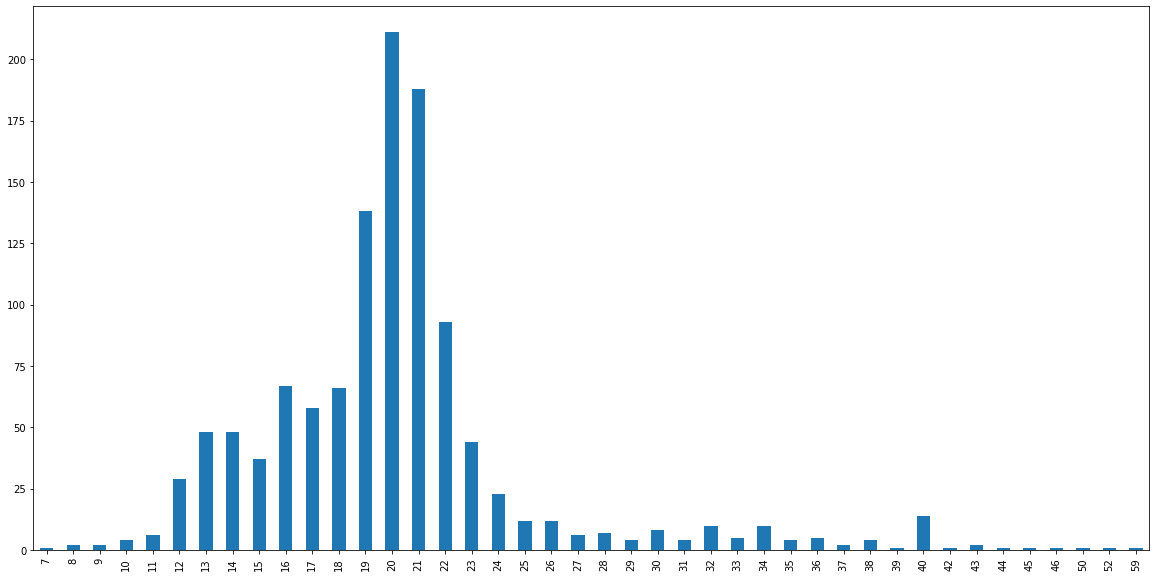

In [313]:
dataset['Age of Subject'].value_counts().sort_index().plot(figsize=(20,10), kind='bar')

In [314]:
df = pd.DataFrame(dataset[
                      (12 <= dataset['Age of Subject'])
                    & (dataset['Age of Subject'] < 23)
                  ])

def get_age_category(age: int):
    if 12 <= age < 16:
        return 'Younger adolescents'
    elif 16 <= age < 19:
        return 'Older adolescents'
    elif 19 <= age < 21:
        return 'Younger students'
    elif 21 <= age < 23:
        return 'Older students'
    return 'NA'

age_categories = ['Younger adolescents', 'Older adolescents', 'Younger students', 'Older students']
df['Age Category'] = pd.Categorical(df['Age of Subject'].map(get_age_category), categories=age_categories, ordered=True)

df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Age Category
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college,Older students
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely,Older students
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling,Younger students
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives",Younger students
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling,Older students
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling,Younger adolescents
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives",Younger adolescents
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college,Younger adolescents
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college,Younger adolescents


In [315]:
print(df.isna().sum())

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     17
Medium for online class                                                               38
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time spent on TV     

In [316]:
df[df.isna().any(axis=1)]['Age Category'].value_counts()

Older students         16
Younger students        9
Older adolescents       8
Younger adolescents     5
Name: Age Category, dtype: int64

In [317]:
df.dropna(axis=0, inplace=True)

In [318]:
df['ID'].duplicated().any()

False

In [319]:
df.dtypes

ID                                                                                      object
Region of residence                                                                     object
Age of Subject                                                                           int64
Time spent on Online Class                                                             float64
Rating of Online Class experience                                                       object
Medium for online class                                                                 object
Time spent on self study                                                               float64
Time spent on fitness                                                                  float64
Time spent on sleep                                                                    float64
Time spent on social media                                                             float64
Prefered social media platform                    

In [320]:
def is_number(element: str):
    return sum(map(lambda c: c.isnumeric() or c == '.', element)) == len(element) and len(element) != 0

notnum_mask = ~df['Time spent on TV'].map(is_number)
df['Time spent on TV'][notnum_mask]

18          n
106         N
111         N
194     No tv
269         N
282         N
545     No tv
616          
751          
1040        N
Name: Time spent on TV, dtype: object

In [321]:
df['Time spent on TV'] = pd.to_numeric(df['Time spent on TV'], errors='coerce').fillna(0)

In [322]:
df['Rating of Online Class experience'].unique()

array(['Good', 'Excellent', 'Very poor', 'Average', 'Poor'], dtype=object)

In [323]:
rating_categories = ['Very poor', 'Poor', 'Average', 'Good', 'Excellent']
df['Rating of Online Class experience'] = df['Rating of Online Class experience'].astype(pd.CategoricalDtype(rating_categories , ordered=True))

<AxesSubplot:xlabel='Rating of Online Class experience'>

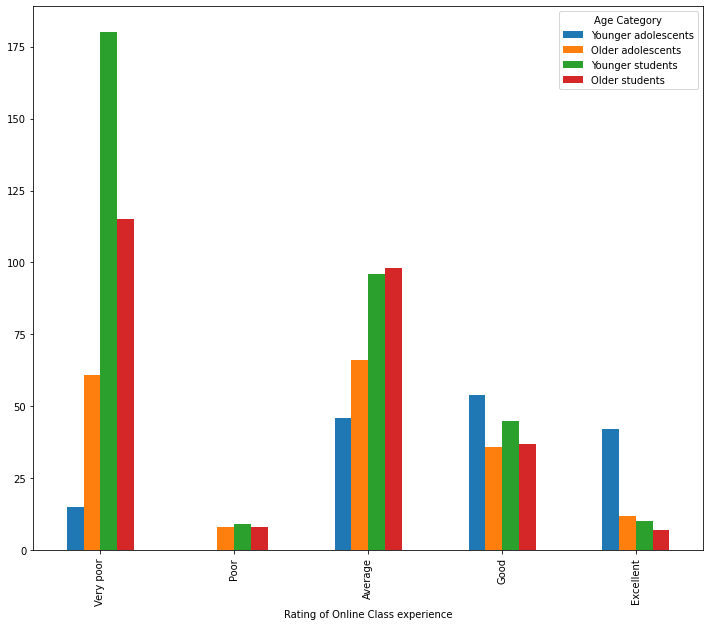

In [324]:
df\
    .groupby(['Age Category', 'Rating of Online Class experience'])\
    .size()\
    .unstack(0)\
    .plot(figsize=(12, 10), kind='bar')